In [1]:
import os
os.environ["OPENAI_API_KEY"]="Your_GPT_key_here"

In [3]:
from dokument import Dokument
from synthesis import Synthesis
import pickle
  
# load your Synthesis object with existing .topic and .eligible_documents attribute
with open("dokument_list.pkl", "rb") as file:
    dokument_list = pickle.load(file)
print("Loaded", len(dokument_list), "documents")

Loaded 9 documents


In [4]:
extract_data_template = """Consider the following text extracted from a document:
{docs}

For each individual study described in the document (if any), extract the following data points:
- Study identifier (e.g., author, year)
- Sample size
- Effect size
- Confidence interval
- P-value
- Any other relevant metrics

For synthesis results (e.g., meta-analyses), extract:
- Overall effect size
- Heterogeneity measures
- Summary statistics
- Confidence interval

"""

from langchain.prompts import ChatPromptTemplate
extract_data_prompt = ChatPromptTemplate.from_template(extract_data_template)

from langchain_openai import ChatOpenAI
gpt4_model = ChatOpenAI(temperature=0, model_name="gpt-4-0125-preview")

from langchain.schema.output_parser import StrOutputParser
str_output_parser = StrOutputParser()

extract_data_chain = extract_data_prompt | gpt4_model | str_output_parser

In [5]:
doklist_3_extracted = extract_data_chain.invoke(dokument_list[3].raw_data)
print(dokument_list[3].DOI)
print(doklist_3_extracted)

10.1145/3290605.3300371
The document describes a single empirical study related to the development and assessment of a Virtual Reality (VR) game called Virtual Showdown, designed for youth with visual impairments. Here are the extracted data points from the study:

**Study Identifier:**
- Authors: Ryan Wedoff, Lindsay Ball, Amelia Wang, Yi Xuan Khoo, Lauren Lieberman, Kyle Rector
- Year: 2019

**Sample Size:**
- 34 participants

**Effect Size:**
- Not explicitly provided in the form of Cohen's d or other standardized effect size measures.

**Confidence Interval:**
- Confidence intervals are not provided in the document.

**P-value:**
- For the difference in Final Score between Verbal and Verbal/Vibration Scaffolds: p<0.05
- For the difference in Final Level reached between conditions for participants who experienced Verbal/Vibration Scaffolds first: p<0.05
- For the effect of prior Showdown experience on Final Score in both conditions: Verbal: p=0.005; Verbal/Vibration: p<0.05

**Other

In [6]:
visualization_template = (
"""
Based on the following extracted data, generate Python code to create visual representations, 
such as forest plots and summary tables.
{docs}
""")
visualization_prompt = ChatPromptTemplate.from_template(visualization_template)

visualization_data_chain = visualization_prompt | gpt4_model | str_output_parser

In [7]:
doklist_3_visualized = visualization_data_chain.invoke(doklist_3_extracted)
print(doklist_3_visualized)

Given the extracted data points from the study on the Virtual Showdown game, we can create visual representations to better understand and communicate the results. Since we don't have effect sizes or confidence intervals, we'll focus on creating a summary table and a bar chart to visualize the differences in final scores and the impact of prior experience on performance. We'll use Python with libraries such as pandas for data manipulation and matplotlib for plotting.

### Step 1: Setting Up the Environment

First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already:

```bash
pip install pandas matplotlib
```

### Step 2: Creating the Data

We'll manually input the data into pandas DataFrames for visualization.

```python
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for the final scores
data_scores = {
    'Condition': ['Verbal', 'Verbal/Vibration', 'Verbal (after V/V)', 'Verbal/Vibration (after Verbal)'

Summary of Final Scores by Condition:
                         Condition  Mean Final Score     Group
0                           Verbal             35.76   Initial
1                 Verbal/Vibration             32.53   Initial
2               Verbal (after V/V)             37.59  Switched
3  Verbal/Vibration (after Verbal)             31.88  Switched

Summary of Final Scores by Prior Experience:
                         Condition  Mean Final Score
0             Verbal w/ Experience             41.87
1            Verbal w/o Experience             30.95
2   Verbal/Vibration w/ Experience             36.13
3  Verbal/Vibration w/o Experience             29.68


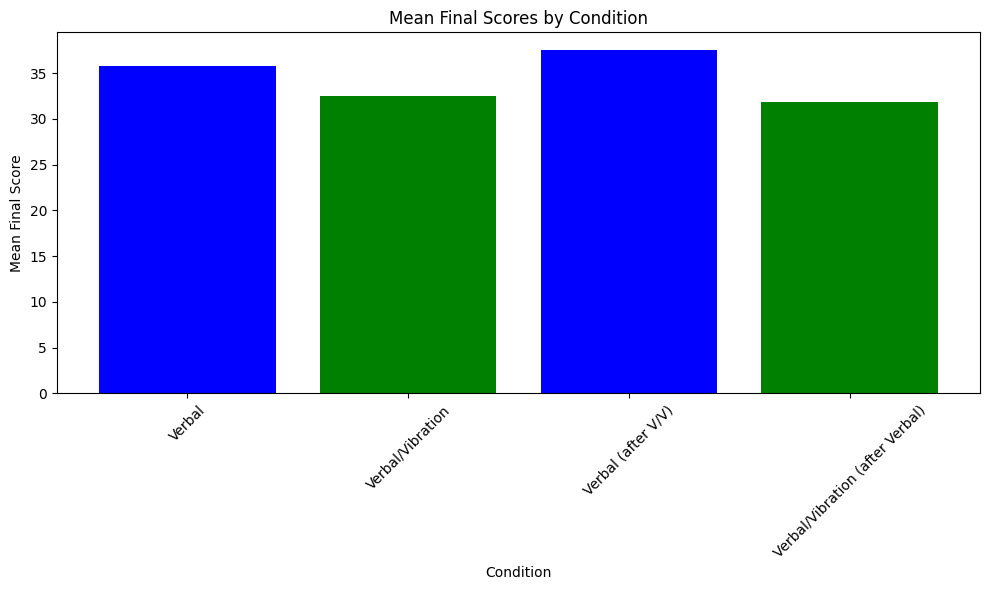

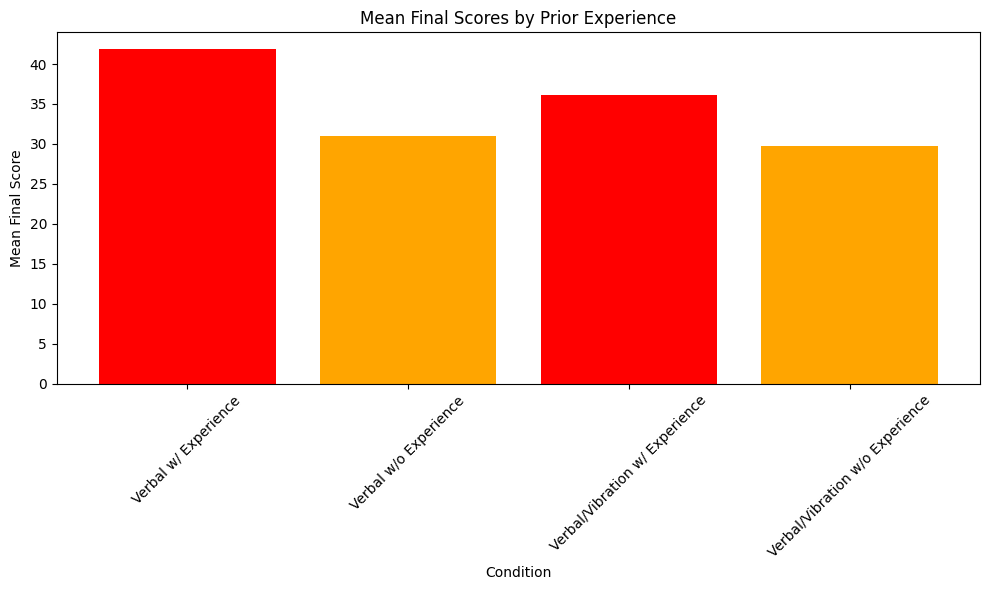

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for the final scores
data_scores = {
    'Condition': ['Verbal', 'Verbal/Vibration', 'Verbal (after V/V)', 'Verbal/Vibration (after Verbal)'],
    'Mean Final Score': [35.76, 32.53, 37.59, 31.88],
    'Group': ['Initial', 'Initial', 'Switched', 'Switched']
}
df_scores = pd.DataFrame(data_scores)

# Creating a DataFrame for the impact of prior experience
data_experience = {
    'Condition': ['Verbal w/ Experience', 'Verbal w/o Experience', 'Verbal/Vibration w/ Experience', 'Verbal/Vibration w/o Experience'],
    'Mean Final Score': [41.87, 30.95, 36.13, 29.68]
}
df_experience = pd.DataFrame(data_experience)


### Step 3: Creating a Summary Table

print("Summary of Final Scores by Condition:")
print(df_scores)
print("\nSummary of Final Scores by Prior Experience:")
print(df_experience)


### Step 4: Visualizing the Data

#### Bar Chart for Final Scores by Condition


plt.figure(figsize=(10, 6))
plt.bar(df_scores['Condition'], df_scores['Mean Final Score'], color=['blue', 'green', 'blue', 'green'])
plt.title('Mean Final Scores by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Final Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Bar Chart for Final Scores by Prior Experience


plt.figure(figsize=(10, 6))
plt.bar(df_experience['Condition'], df_experience['Mean Final Score'], color=['red', 'orange', 'red', 'orange'])
plt.title('Mean Final Scores by Prior Experience')
plt.xlabel('Condition')
plt.ylabel('Mean Final Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Metric': ['Final Score Difference (Verbal vs. Verbal/Vibration)', 
               'Final Level Difference (Verbal/Vibration first)', 
               'Effect of Prior Showdown Experience on Final Score (Verbal)', 
               'Effect of Prior Showdown Experience on Final Score (Verbal/Vibration)', 
               'Effect of Ball Trajectory on Ball Outcome', 
               'Effect of Ball Arrival Location on Ball Outcome', 
               'Final Score Difference for Verbal/Vibration First', 
               'Final Level Improvement (Verbal/Vibration first)', 
               'Final Score Difference with Showdown Experience (Verbal vs. Verbal/Vibration)', 
               'Final Score Improvement with Showdown Experience (Verbal Second)'],
    'P-Value': ['<0.05', '<0.05', '0.005', '<0.05', '2.92e-5', '<0.05', '0.002', '<0.05', '0.004', '0.006'],
    'Test': ['Paired t-test', 'Wilcoxon Signed Rank test', 't-test', 't-test', 'Friedman test', 'Friedman test', 'Paired t-test', 'Wilcoxon Signed Rank test', 't-test', 't-test']
}

df = pd.DataFrame(data)

# Summary Table
print("Summary of Study Findings:")
print(df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='P-Value', y='Metric', hue='Test', dodge=False, data=df)
plt.title('Summary of P-Values by Metric and Test Type')
plt.xlabel('P-Value')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.tight_layout()

# Additional Metrics Visualization
additional_metrics = {
    'Condition': ['Verbal w/ Experience', 'Verbal w/o Experience', 'Verbal/Vibration w/ Experience', 'Verbal/Vibration w/o Experience', 'Dominant Hand Side', 'Diagonal to Dominant Hand Side', 'Center Arrival', 'Opposite of Dominant Hand Arrival'],
    'Mean Score': [41.87, 30.95, 36.13, 29.68, 2.35, 1.63, 2.32, 1.72]
}

df_metrics = pd.DataFrame(additional_metrics)

plt.figure(figsize=(12, 6))
sns.barplot(x='Mean Score', y='Condition', data=df_metrics)
plt.title('Additional Relevant Metrics')
plt.xlabel('Mean Score')
plt.ylabel('Condition/Outcome')
plt.tight_layout()

plt.show()

                                     Metric        P-Value  \
0             Final Score (Verbal Scaffold)          <0.05   
1   Final Score (Verbal/Vibration Scaffold)  0.005 & <0.05   
2                    Ball Trajectory Effect        2.92e-5   
3              Ball Arrival Location Effect          <0.05   
4  Learning Effect (Verbal/Vibration first)  0.002 & <0.05   

                                             Details  
0         Higher scores in Verbal Scaffold condition  
1  Prior Showdown experience impacts scores in bo...  
2      Significant trajectory effect on Ball Outcome  
3  Significant arrival location effect on Ball Ou...  
4  Significant learning effects in Verbal/Vibrati...  


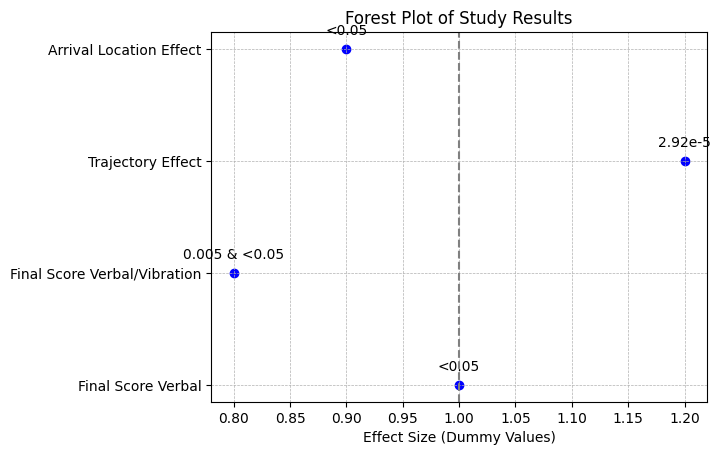

In [10]:
import pandas as pd

# Creating a summary table
data = {
    'Metric': ['Final Score (Verbal Scaffold)', 'Final Score (Verbal/Vibration Scaffold)', 'Ball Trajectory Effect', 'Ball Arrival Location Effect', 'Learning Effect (Verbal/Vibration first)'],
    'P-Value': ['<0.05', '0.005 & <0.05', '2.92e-5', '<0.05', '0.002 & <0.05'],
    'Details': [
        'Higher scores in Verbal Scaffold condition',
        'Prior Showdown experience impacts scores in both conditions',
        'Significant trajectory effect on Ball Outcome',
        'Significant arrival location effect on Ball Outcome',
        'Significant learning effects in Verbal/Vibration first condition'
    ]
}

summary_table = pd.DataFrame(data)
print(summary_table)

import matplotlib.pyplot as plt

# Dummy effect sizes for illustrative purposes
effects = [1, 0.8, 1.2, 0.9]  # These are not real effect sizes, just for illustration
conditions = ['Final Score Verbal', 'Final Score Verbal/Vibration', 'Trajectory Effect', 'Arrival Location Effect']
p_values = ['<0.05', '0.005 & <0.05', '2.92e-5', '<0.05']

fig, ax = plt.subplots()

# Creating a basic forest plot
ax.scatter(effects, conditions, color='blue')

# Adding p-value annotations
for i, txt in enumerate(p_values):
    ax.annotate(txt, (effects[i], conditions[i]), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xlabel('Effect Size (Dummy Values)')
ax.set_title('Forest Plot of Study Results')
plt.axvline(x=1, color='grey', linestyle='--')  # Dummy line for no effect
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

                                          Comparison  P-Value  \
0          Final Score (Verbal vs. Verbal/Vibration)    <0.05   
1  Effect of Prior Showdown Experience on Final S...    0.005   
2  Effect of Prior Showdown Experience on Final S...    <0.05   
3          Effect of Ball Trajectory on Ball Outcome  2.92e-5   
4    Effect of Ball Arrival Location on Ball Outcome    <0.05   
5  Final Score Comparison for Verbal/Vibration Fi...    0.002   
6  Final Level for Verbal/Vibration First Partici...    <0.05   

  Mean Score (With Experience) Mean Score (Without Experience)  \
0                          N/A                             N/A   
1                        41.87                           30.95   
2                        36.13                           29.68   
3                          N/A                             N/A   
4                          N/A                             N/A   
5                          N/A                             N/A   
6                

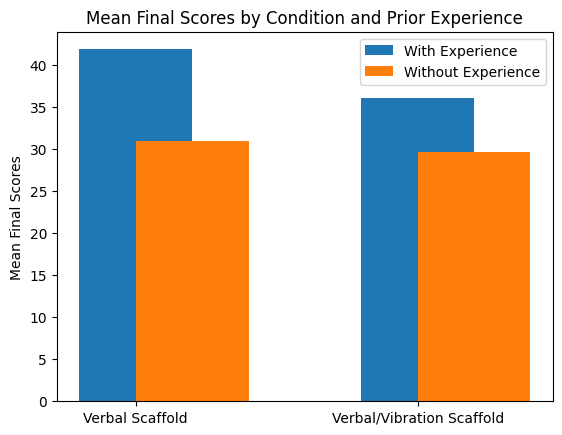

In [11]:
# manually copy, paste and execute the codes generated
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for the main findings
data = {
    'Comparison': ['Final Score (Verbal vs. Verbal/Vibration)', 'Effect of Prior Showdown Experience on Final Score (Verbal Scaffold)', 'Effect of Prior Showdown Experience on Final Score (Verbal/Vibration Scaffold)', 'Effect of Ball Trajectory on Ball Outcome', 'Effect of Ball Arrival Location on Ball Outcome', 'Final Score Comparison for Verbal/Vibration First Participants', 'Final Level for Verbal/Vibration First Participants'],
    'P-Value': ['<0.05', '0.005', '<0.05', '2.92e-5', '<0.05', '0.002', '<0.05'],
    'Mean Score (With Experience)': ['N/A', '41.87', '36.13', 'N/A', 'N/A', 'N/A', 'N/A'],
    'Mean Score (Without Experience)': ['N/A', '30.95', '29.68', 'N/A', 'N/A', 'N/A', 'N/A'],
    'Mean Score (Dominant Hand Side)': ['N/A', 'N/A', 'N/A', '2.35', 'N/A', 'N/A', 'N/A'],
    'Mean Score (Diagonal to Dominant Hand Side)': ['N/A', 'N/A', 'N/A', '1.63', 'N/A', 'N/A', 'N/A'],
    'Mean Ball Outcome (Center)': ['N/A', 'N/A', 'N/A', 'N/A', '2.32', 'N/A', 'N/A'],
    'Mean Ball Outcome (Opposite of Dominant Hand)': ['N/A', 'N/A', 'N/A', 'N/A', '1.72', 'N/A', 'N/A']
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Data for plotting
labels = ['Verbal Scaffold', 'Verbal/Vibration Scaffold']
means_with_experience = [41.87, 36.13]
means_without_experience = [30.95, 29.68]

x = range(len(labels))  # the label locations

fig, ax = plt.subplots()
ax.bar(x, means_with_experience, width=0.4, label='With Experience', align='center')
ax.bar(x, means_without_experience, width=0.4, label='Without Experience', align='edge')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Final Scores')
ax.set_title('Mean Final Scores by Condition and Prior Experience')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
